# Módulo 3 — Engenharia de Atributos

## Prática
A prática tem como foco exclusivo a aplicação de técnicas de engenharia de atributos em um dataset estruturado no nível cliente–mês. Inicialmente, o aluno deverá analisar como diferentes objetivos preditivos implicam mudanças na unidade de análise e na construção de variáveis agregadas. Em seguida, deverá aplicar técnicas de criação de atributos, codificação de variáveis categóricas, transformações matemáticas e escalonamento, avaliando como essas operações alteram distribuições, escalas, correlações e dimensionalidade da base, sem ainda realizar modelagem.

## Dataset
O arquivo dataset_cartao_mensal.csv representa informações mensais de clientes de cartão de crédito. Cada linha corresponde a um cliente em um determinado mês, contendo variáveis financeiras e comportamentais observadas ao longo do relacionamento.

•	id_cliente: identificador do cliente.

•	ano_mes: referência temporal da observação (formato AAAA-MM).

•	renda_mensal: renda mensal declarada do cliente.

•	limite_credito: limite total disponível no cartão.

•	valor_fatura: valor total da fatura no mês.

•	pagamento_realizado: valor efetivamente pago no mês.

•	atraso_dias: número de dias de atraso no pagamento.

•	tempo_relacionamento_meses: tempo de relacionamento com a instituição.

•	segmento_cliente: segmento do cliente (varejo, premium).

•	inadimplente_mes_seguinte: indicador de inadimplência no mês seguinte (1 = sim, 0 = não).

•	cancelou_cartao_3m: indicador de cancelamento do cartão nos próximos 3 meses (1 = sim, 0 = não).

In [8]:
import pandas as pd

df = pd.read_csv("dataset_cartao_mensal.csv", sep=None, engine="python")

df.shape
df.head(100)

,id_cliente,ano_mes,segmento_cliente,renda_mensal,limite_credito,valor_fatura,pagamento_realizado,atraso_dias,tempo_relacionamento_meses,inadimplente_mes_seguinte,cancelou_cartao_3m
0,1,2024-01,premium,3230.27,15955.86,2417.35,1595.18,19,20,0,0
1,1,2024-02,premium,3558.59,15955.86,2106.18,2015.89,0,21,0,1
2,1,2024-03,premium,3367.24,15955.86,2733.31,2733.31,0,22,0,1
3,1,2024-04,premium,3313.52,15955.86,1749.49,1160.76,15,23,0,1
4,1,2024-05,premium,3573.74,15955.86,1110.23,1050.90,0,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,16,2024-06,varejo,3498.39,17563.43,1972.80,1906.71,0,25,0,0
96,17,2024-01,varejo,3754.02,9074.55,3609.65,1957.92,27,15,1,0
97,17,2024-02,varejo,3929.89,9074.55,2718.66,2718.66,0,16,0,0
98,17,2024-03,varejo,3842.29,9074.55,2335.59,2248.02,0,17,0,0


### Pergunta
1.	Considerando que o objetivo é prever a inadimplência no próximo mês, qual é a unidade de análise adequada?
2.	Considerando que o objetivo é prever o cancelamento do cartão nos próximos 3 meses, a unidade de análise seria cliente–mês ou cliente?


In [9]:
# Conhecer valores estatísticos básicos do dataset.
df.describe()

,id_cliente,renda_mensal,limite_credito,valor_fatura,pagamento_realizado,atraso_dias,tempo_relacionamento_meses,inadimplente_mes_seguinte,cancelou_cartao_3m
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,150.500000,4489.551906,18009.377833,2890.046539,2589.926011,4.587778,33.796667,0.070556,0.234444
std,86.626125,2289.839422,11489.701243,1920.200973,1808.883669,8.634514,16.412444,0.256152,0.423769
min,1.000000,856.370000,2657.450000,257.820000,239.350000,0.000000,3.000000,0.000000,0.000000
25%,75.750000,2826.040000,9932.490000,1480.762500,1278.670000,0.000000,20.000000,0.000000,0.000000
50%,150.500000,4087.380000,14500.855000,2443.695000,2111.605000,0.000000,33.000000,0.000000,0.000000
75%,225.250000,5526.122500,23341.130000,3758.072500,3424.805000,6.000000,48.000000,0.000000,0.000000
max,300.000000,14966.930000,81511.440000,12864.770000,12284.230000,30.000000,64.000000,1.000000,1.000000


In [10]:
# Checar tipos, nulos e consistência do campo temporal.
df.info()
df.isna().sum().sort_values(ascending=False).head(15)

<class 'pandas.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_cliente                  1800 non-null   int64  
 1   ano_mes                     1800 non-null   str    
 2   segmento_cliente            1800 non-null   str    
 3   renda_mensal                1800 non-null   float64
 4   limite_credito              1800 non-null   float64
 5   valor_fatura                1800 non-null   float64
 6   pagamento_realizado         1800 non-null   float64
 7   atraso_dias                 1800 non-null   int64  
 8   tempo_relacionamento_meses  1800 non-null   int64  
 9   inadimplente_mes_seguinte   1800 non-null   int64  
 10  cancelou_cartao_3m          1800 non-null   int64  
dtypes: float64(4), int64(5), str(2)
memory usage: 154.8 KB


id_cliente                    0
ano_mes                       0
segmento_cliente              0
renda_mensal                  0
limite_credito                0
valor_fatura                  0
pagamento_realizado           0
atraso_dias                   0
tempo_relacionamento_meses    0
inadimplente_mes_seguinte     0
cancelou_cartao_3m            0
dtype: int64

In [11]:
# Padronizar ano_mes como data e ordenar por cliente-mês (base para agregações/janelas).
df["ano_mes"] = pd.to_datetime(df["ano_mes"], format="%Y-%m")
df = df.sort_values(["id_cliente", "ano_mes"]).reset_index(drop=True)

df[["id_cliente", "ano_mes"]].head(10)

,id_cliente,ano_mes
0,1,2024-01-01
1,1,2024-02-01
2,1,2024-03-01
3,1,2024-04-01
4,1,2024-05-01
5,1,2024-06-01
6,2,2024-01-01
7,2,2024-02-01
8,2,2024-03-01
9,2,2024-04-01


In [12]:
# Validar granularidade cliente–mês (ver se existe duplicidade de chave)
dup = df.duplicated(subset=["id_cliente", "ano_mes"]).sum()
dup

np.int64(0)

In [13]:
# Verificar proporção de eventos no nível cliente–mês.

proporcoes = pd.DataFrame({
    "inadimplente_mes_seguinte": df["inadimplente_mes_seguinte"].value_counts(normalize=True),
    "cancelou_cartao_3m": df["cancelou_cartao_3m"].value_counts(normalize=True)
})

proporcoes

,inadimplente_mes_seguinte,cancelou_cartao_3m
0,0.929444,0.765556
1,0.070556,0.234444


### Pergunta
3.	Crie a variável utilizacao_credito = valor_fatura / limite_credito. Essa razão altera a escala ou a forma da distribuição em relação às variáveis originais? Explique.
4.	Crie comprometimento_renda = valor_fatura / renda_mensal. Compare sua variabilidade com a de valor_fatura e renda_mensal.


In [14]:
# Adicionar variáveis derivadas ao dataframe.

df["utilizacao_credito"] = df["valor_fatura"] / df["limite_credito"]
df["comprometimento_renda"] = df["valor_fatura"] / df["renda_mensal"]

df[["utilizacao_credito", "comprometimento_renda"]].head()

,utilizacao_credito,comprometimento_renda
0,0.151502,0.748343
1,0.132000,0.591858
2,0.171304,0.811736
3,0.109646,0.527985
4,0.069581,0.310663


### Pergunta
5.	Aplique log em renda_mensal. Compare assimetria antes e depois da transformação.

In [15]:
# Avaliar assimetria antes da transformação.
df["renda_mensal"].skew()

np.float64(1.2587016657752068)

In [16]:
# Aplicar transformação logarítmica.
import numpy as np
df["log_renda_mensal"] = np.log(df["renda_mensal"])

In [17]:
# Avaliar assimetria após transformação.
df["log_renda_mensal"].skew()

np.float64(-0.16904934478456227)

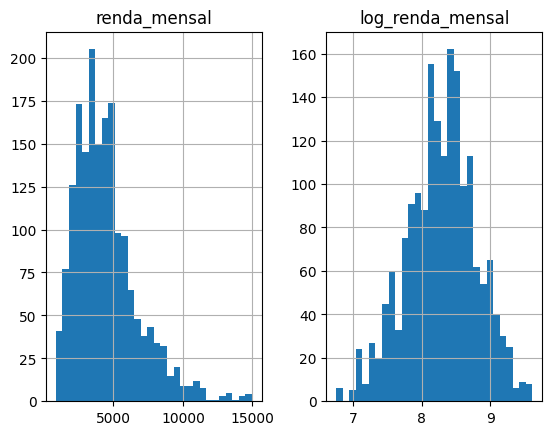

In [18]:
# Comparar distribuições visualmente.
import matplotlib.pyplot as plt

df[["renda_mensal", "log_renda_mensal"]].hist(bins=30)
plt.show()

### Pergunta
6.	Ao criar média móvel de valor_fatura (janela 3 meses por cliente), a granularidade da base muda? Há perda de observações?

In [19]:
# Objetivo: garantir ordenação temporal correta
df = df.sort_values(["id_cliente", "ano_mes"])

In [20]:
# Objetivo: criar média móvel de 3 meses por cliente
df["media_movel_3m_fatura"] = (
    df.groupby("id_cliente")["valor_fatura"]
      .rolling(window=3)
      .mean()
      .reset_index(level=0, drop=True)
)

In [21]:
# Objetivo: verificar impacto nas primeiras observações
df[["id_cliente", "ano_mes", "valor_fatura", "media_movel_3m_fatura"]].head(10)

,id_cliente,ano_mes,valor_fatura,media_movel_3m_fatura
0,1,2024-01-01,2417.35,NaN
1,1,2024-02-01,2106.18,NaN
2,1,2024-03-01,2733.31,2418.946667
3,1,2024-04-01,1749.49,2196.326667
4,1,2024-05-01,1110.23,1864.343333
5,1,2024-06-01,3248.30,2036.006667
6,2,2024-01-01,3274.48,NaN
7,2,2024-02-01,1049.20,NaN
8,2,2024-03-01,3269.93,2531.203333
9,2,2024-04-01,1243.75,1854.293333


In [22]:
# Objetivo: verificar quantidade de valores ausentes gerados
df["media_movel_3m_fatura"].isna().sum()

np.int64(600)

### Pergunta
7.	Codifique segmento_cliente via one-hot encoding. Quantas colunas novas surgem? Há risco de multicolinearidade?

In [23]:
# Verificar categorias existentes.
df["segmento_cliente"].value_counts()

segmento_cliente
varejo     1350
premium     450
Name: count, dtype: int64

In [24]:
# Aplicar one-hot encoding (evitando dummy trap).
df = pd.get_dummies(df, columns=["segmento_cliente"], drop_first=True)

In [25]:
# Verificar novas colunas criadas.
df.filter(like="segmento_cliente").head()

,segmento_cliente_varejo
0,False
1,False
2,False
3,False
4,False


In [26]:
# Objetivo: conferir dimensionalidade após codificação
display(df.shape)
display(df.head(100))

(1800, 15)

,id_cliente,ano_mes,renda_mensal,limite_credito,valor_fatura,pagamento_realizado,atraso_dias,tempo_relacionamento_meses,inadimplente_mes_seguinte,cancelou_cartao_3m,utilizacao_credito,comprometimento_renda,log_renda_mensal,media_movel_3m_fatura,segmento_cliente_varejo
0,1,2024-01-01,3230.27,15955.86,2417.35,1595.18,19,20,0,0,0.151502,0.748343,8.080321,NaN,False
1,1,2024-02-01,3558.59,15955.86,2106.18,2015.89,0,21,0,1,0.132000,0.591858,8.177120,NaN,False
2,1,2024-03-01,3367.24,15955.86,2733.31,2733.31,0,22,0,1,0.171304,0.811736,8.121849,2418.946667,False
3,1,2024-04-01,3313.52,15955.86,1749.49,1160.76,15,23,0,1,0.109646,0.527985,8.105766,2196.326667,False
4,1,2024-05-01,3573.74,15955.86,1110.23,1050.90,0,24,0,0,0.069581,0.310663,8.181368,1864.343333,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16,2024-06-01,3498.39,17563.43,1972.80,1906.71,0,25,0,0,0.112324,0.563917,8.160058,2168.050000,True
96,17,2024-01-01,3754.02,9074.55,3609.65,1957.92,27,15,1,0,0.397777,0.961543,8.230583,NaN,True
97,17,2024-02-01,3929.89,9074.55,2718.66,2718.66,0,16,0,0,0.299592,0.691790,8.276367,NaN,True
98,17,2024-03-01,3842.29,9074.55,2335.59,2248.02,0,17,0,0,0.257378,0.607864,8.253824,2887.966667,True


### Pergunta
8. Avalie a matriz de correlação entre variáveis numéricas. Há pares com |corr| > 0.8? Remover alguma delas alteraria significativamente a estrutura informacional?

In [27]:
# Matriz de correlação entre variáveis numéricas.
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,id_cliente,renda_mensal,limite_credito,valor_fatura,pagamento_realizado,atraso_dias,tempo_relacionamento_meses,inadimplente_mes_seguinte,cancelou_cartao_3m,utilizacao_credito,comprometimento_renda,log_renda_mensal,media_movel_3m_fatura,segmento_cliente_varejo
id_cliente,1.000000,-0.055751,-0.061301,-0.042619,-0.046473,0.027523,0.081012,0.022183,-0.010554,0.015473,0.006735,-0.061161,-0.044835,-0.014800
renda_mensal,-0.055751,1.000000,0.849794,0.747356,0.718847,-0.009484,0.070169,-0.007913,0.029528,-0.062147,-0.024375,0.945496,0.887230,0.044409
limite_credito,-0.061301,0.849794,1.000000,0.631088,0.602964,-0.008545,0.091229,-0.015808,0.068826,-0.329707,-0.015164,0.797330,0.750350,0.027031
valor_fatura,-0.042619,0.747356,0.631088,1.000000,0.961506,-0.015363,0.031683,-0.009304,-0.018679,0.383482,0.575265,0.710929,0.844359,0.028537
pagamento_realizado,-0.046473,0.718847,0.602964,0.961506,1.000000,-0.230589,0.022462,-0.166466,-0.031506,0.367475,0.547088,0.683162,0.815744,0.024273
atraso_dias,0.027523,-0.009484,-0.008545,-0.015363,-0.230589,1.000000,0.003837,0.619349,0.046024,0.006465,0.013396,-0.009008,-0.025349,0.000817
tempo_relacionamento_meses,0.081012,0.070169,0.091229,0.031683,0.022462,0.003837,1.000000,-0.014568,-0.036620,-0.027372,-0.026978,0.045046,0.045604,-0.105445
inadimplente_mes_seguinte,0.022183,-0.007913,-0.015808,-0.009304,-0.166466,0.619349,-0.014568,1.000000,0.026759,0.011363,0.002491,-0.004195,-0.003974,-0.006263
cancelou_cartao_3m,-0.010554,0.029528,0.068826,-0.018679,-0.031506,0.046024,-0.036620,0.026759,1.000000,-0.127496,-0.069485,0.035028,0.033467,0.007571
utilizacao_credito,0.015473,-0.062147,-0.329707,0.383482,0.367475,0.006465,-0.027372,0.011363,-0.127496,1.000000,0.734234,-0.059853,0.115117,0.040073


In [28]:
# Listar pares altamente correlacionados.
import numpy as np

threshold = 0.8
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["var1", "var2", "corr"]
corr_pairs[abs(corr_pairs["corr"]) > threshold]

,var1,var2,corr
16,renda_mensal,limite_credito,0.849794
25,renda_mensal,log_renda_mensal,0.945496
26,renda_mensal,media_movel_3m_fatura,0.887230
46,valor_fatura,pagamento_realizado,0.961506
54,valor_fatura,media_movel_3m_fatura,0.844359
68,pagamento_realizado,media_movel_3m_fatura,0.815744
166,log_renda_mensal,media_movel_3m_fatura,0.843865


### Pergunta
9.	Padronize apenas variáveis numéricas contínuas. Quais passam a ter média ~0 e desvio padrão ~1?

In [29]:
# Selecionar variáveis numéricas contínuas (excluindo IDs, alvos e media_movel_3m_fatura).
numericas = [
    "renda_mensal",
    "limite_credito",
    "valor_fatura",
    "pagamento_realizado",
    "atraso_dias",
    "tempo_relacionamento_meses",
    "utilizacao_credito",
    "comprometimento_renda",
    "log_renda_mensal"
]

numericas

['renda_mensal',
 'limite_credito',
 'valor_fatura',
 'pagamento_realizado',
 'atraso_dias',
 'tempo_relacionamento_meses',
 'utilizacao_credito',
 'comprometimento_renda',
 'log_renda_mensal']

In [30]:
# Verificar média e desvio após padronização.
df[numericas].agg(["mean", "std"])

,renda_mensal,limite_credito,valor_fatura,pagamento_realizado,atraso_dias,tempo_relacionamento_meses,utilizacao_credito,comprometimento_renda,log_renda_mensal
mean,4489.551906,18009.377833,2890.046539,2589.926011,4.587778,33.796667,0.180557,0.646899,8.285637
std,2289.839422,11489.701243,1920.200973,1808.883669,8.634514,16.412444,0.095524,0.255255,0.505614


In [35]:
# Aplicar padronização (StandardScaler).
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numericas] = scaler.fit_transform(df[numericas])

In [36]:
# Verificar média e desvio após padronização.
df[numericas].agg(["mean", "std"])

,renda_mensal,limite_credito,valor_fatura,pagamento_realizado,atraso_dias,tempo_relacionamento_meses,utilizacao_credito,comprometimento_renda,log_renda_mensal
mean,2.072416e-16,-2.210577e-16,6.217249e-17,-3.454027e-17,2.171103e-17,0.000000,9.276530e-17,1.203975e-16,-8.033080e-16
std,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278,1.000278e+00,1.000278e+00,1.000278e+00


### Pergunta
10.	Após todas as transformações (razões, log, one-hot, médias móveis), a dimensionalidade aumentou ou diminuiu? Quantifique.

In [37]:
# Verificar dimensionalidade atual da base.
df.shape

(1800, 15)

In [38]:
# Comparar dimensionalidade inicial vs atual.
colunas_iniciais = 11
colunas_atuais = df.shape[1]

print("Colunas iniciais:", colunas_iniciais)
print("Colunas atuais:", colunas_atuais)
print("Variação:", colunas_atuais - colunas_iniciais)

Colunas iniciais: 11
Colunas atuais: 15
Variação: 4


### Pergunta
11.	Agregar informações de todos os meses de um cliente pode gerar vazamento ao prever inadimplência futura? Em que condição temporal isso ocorre?

In [39]:
# Verificar se há uso explícito de informação futura.
df.sort_values(["id_cliente", "ano_mes"]).head(10)

,id_cliente,ano_mes,renda_mensal,limite_credito,valor_fatura,pagamento_realizado,atraso_dias,tempo_relacionamento_meses,inadimplente_mes_seguinte,cancelou_cartao_3m,utilizacao_credito,comprometimento_renda,log_renda_mensal,media_movel_3m_fatura,segmento_cliente_varejo
0,1,2024-01-01,-0.550096,-0.178776,-0.246239,-0.550075,1.669605,-0.840856,0,0,-0.304242,0.397533,-0.406186,NaN,False
1,1,2024-02-01,-0.406675,-0.178776,-0.408335,-0.317431,-0.531478,-0.779910,0,1,-0.508455,-0.215690,-0.214685,NaN,False
2,1,2024-03-01,-0.490263,-0.178776,-0.081648,0.079289,-0.531478,-0.718963,0,1,-0.096885,0.645954,-0.324030,2418.946667,False
3,1,2024-04-01,-0.513730,-0.178776,-0.594143,-0.790301,1.206219,-0.658017,0,1,-0.742542,-0.465991,-0.355846,2196.326667,False
4,1,2024-05-01,-0.400057,-0.178776,-0.927148,-0.851052,-0.531478,-0.597071,0,0,-1.162073,-1.317619,-0.206280,1864.343333,False
5,1,2024-06-01,-0.461729,-0.178776,0.186623,0.341280,-0.531478,-0.536124,0,0,0.241091,1.173353,-0.286020,2036.006667,False
6,2,2024-01-01,-0.309497,0.376245,0.200260,-0.142379,0.511140,1.109426,0,1,-0.355230,0.858694,-0.094724,NaN,True
7,2,2024-02-01,-0.301542,0.376245,-0.958940,-0.851992,-0.531478,1.170372,0,0,-1.398702,-1.452832,-0.085218,NaN,True
8,2,2024-03-01,-0.240146,0.376245,0.197890,0.296759,-0.531478,1.231319,0,0,-0.357364,0.717414,-0.013353,2531.203333,True
9,2,2024-04-01,-0.237079,0.376245,-0.857595,-0.744409,-0.531478,1.292265,0,0,-1.307474,-1.300129,-0.009831,1854.293333,True


### Pergunta
12.	Alguma variável pode funcionar como proxy indireto do alvo dependendo do horizonte escolhido? Justifique.

In [40]:
# Avaliar correlação com inadimplência proximo mês.
df.corr(numeric_only=True)["inadimplente_mes_seguinte"].sort_values(ascending=False)

inadimplente_mes_seguinte     1.000000
atraso_dias                   0.619349
cancelou_cartao_3m            0.026759
id_cliente                    0.022183
utilizacao_credito            0.011363
comprometimento_renda         0.002491
media_movel_3m_fatura        -0.003974
log_renda_mensal             -0.004195
segmento_cliente_varejo      -0.006263
renda_mensal                 -0.007913
valor_fatura                 -0.009304
tempo_relacionamento_meses   -0.014568
limite_credito               -0.015808
pagamento_realizado          -0.166466
Name: inadimplente_mes_seguinte, dtype: float64

In [41]:
# Avaliar correlação de "tudo com tudo".
corr = df.corr(numeric_only=True)
corr

,id_cliente,renda_mensal,limite_credito,valor_fatura,pagamento_realizado,atraso_dias,tempo_relacionamento_meses,inadimplente_mes_seguinte,cancelou_cartao_3m,utilizacao_credito,comprometimento_renda,log_renda_mensal,media_movel_3m_fatura,segmento_cliente_varejo
id_cliente,1.000000,-0.055751,-0.061301,-0.042619,-0.046473,0.027523,0.081012,0.022183,-0.010554,0.015473,0.006735,-0.061161,-0.044835,-0.014800
renda_mensal,-0.055751,1.000000,0.849794,0.747356,0.718847,-0.009484,0.070169,-0.007913,0.029528,-0.062147,-0.024375,0.945496,0.887230,0.044409
limite_credito,-0.061301,0.849794,1.000000,0.631088,0.602964,-0.008545,0.091229,-0.015808,0.068826,-0.329707,-0.015164,0.797330,0.750350,0.027031
valor_fatura,-0.042619,0.747356,0.631088,1.000000,0.961506,-0.015363,0.031683,-0.009304,-0.018679,0.383482,0.575265,0.710929,0.844359,0.028537
pagamento_realizado,-0.046473,0.718847,0.602964,0.961506,1.000000,-0.230589,0.022462,-0.166466,-0.031506,0.367475,0.547088,0.683162,0.815744,0.024273
atraso_dias,0.027523,-0.009484,-0.008545,-0.015363,-0.230589,1.000000,0.003837,0.619349,0.046024,0.006465,0.013396,-0.009008,-0.025349,0.000817
tempo_relacionamento_meses,0.081012,0.070169,0.091229,0.031683,0.022462,0.003837,1.000000,-0.014568,-0.036620,-0.027372,-0.026978,0.045046,0.045604,-0.105445
inadimplente_mes_seguinte,0.022183,-0.007913,-0.015808,-0.009304,-0.166466,0.619349,-0.014568,1.000000,0.026759,0.011363,0.002491,-0.004195,-0.003974,-0.006263
cancelou_cartao_3m,-0.010554,0.029528,0.068826,-0.018679,-0.031506,0.046024,-0.036620,0.026759,1.000000,-0.127496,-0.069485,0.035028,0.033467,0.007571
utilizacao_credito,0.015473,-0.062147,-0.329707,0.383482,0.367475,0.006465,-0.027372,0.011363,-0.127496,1.000000,0.734234,-0.059853,0.115117,0.040073


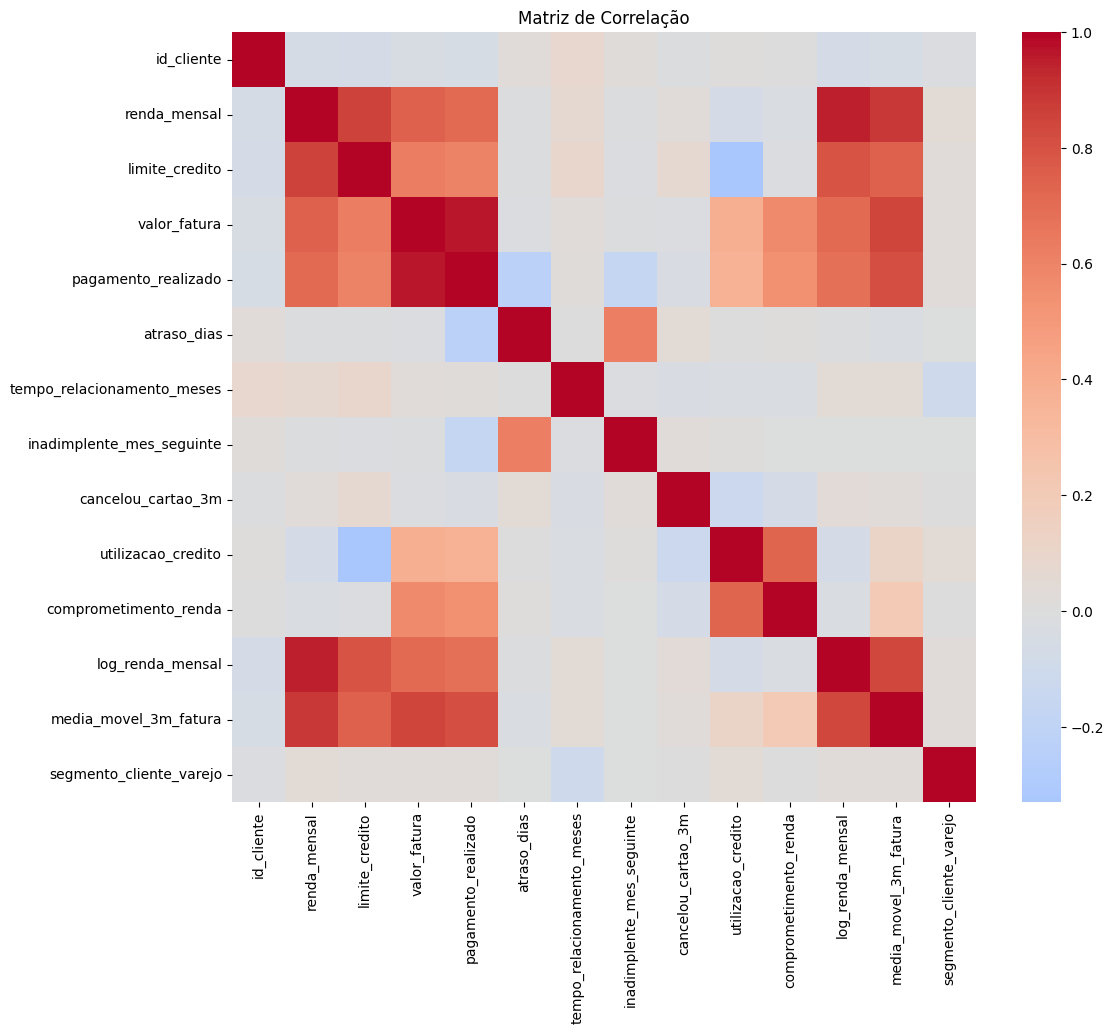

In [44]:
# Ver a mesma correlação da tabela anterior, mas visualmente usando heatmap ("share").
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="coolwarm",
    center=0,
    annot=False
)
plt.title("Matriz de Correlação")
plt.show()